<a href="https://colab.research.google.com/github/ahamedistiaque/Handwritten-digits-classification-ANN/blob/main/Fashion_Images_classification_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


loading datasets

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


[link text](https://www.tensorflow.org/tutorials/keras/classification#import_the_fashion_mnist_dataset) 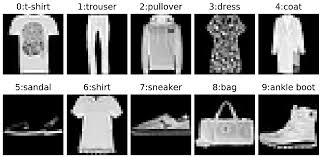

In [4]:
print('x_train:',train_images.shape)
print('x_test:',test_images.shape)
print('y_train:',train_labels.shape)
print('y_test:',test_labels.shape)

x_train: (60000, 28, 28)
x_test: (10000, 28, 28)
y_train: (60000,)
y_test: (10000,)


###let's check data and visualize

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
class_names[4]

'Coat'

In [7]:
def show_img(img):
  plt.figure(figsize=(1,1))
  plt.imshow(img)
  plt.show()

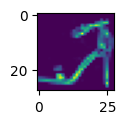

In [8]:
show_img(train_images[8])

In [9]:
class_names[train_labels[8]]

'Sandal'

<Figure size 100x100 with 0 Axes>

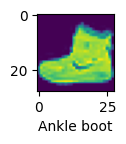

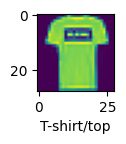

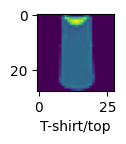

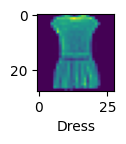

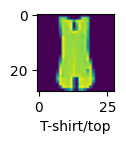

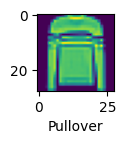

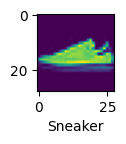

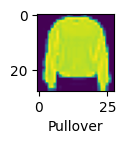

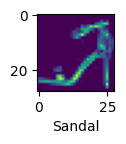

In [10]:
plt.figure(figsize=(1,1))
for i in range(9):
    plt.figure(figsize=(1,1))
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

scaling

In [11]:
train_images_scl=train_images/255
test_images_scl=test_images/255

In [12]:
#test_images_scl[1]

convert "labels" to categorical

In [13]:
train_labels_cgl=keras.utils.to_categorical(
                 train_labels, num_classes=10, dtype='float32')
test_labels_cgl=keras.utils.to_categorical(
                 test_labels, num_classes=10, dtype='float32')

#Model

In [14]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28, 28))]) #Flatten and input layer 

# Hidden layer 
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dense(250, activation='relu'))

#output layer
model.add(keras.layers.Dense(10, activation='sigmoid'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images_scl, train_labels_cgl, epochs=50)


Epoch 1/50
1875/1875 [==============================] - 15s 4ms/step - loss: 0.6785 - accuracy: 0.7749
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4713 - accuracy: 0.8363
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4269 - accuracy: 0.8513
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3998 - accuracy: 0.8599
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3802 - accuracy: 0.8665
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3634 - accuracy: 0.8712
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3494 - accuracy: 0.8764
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3376 - accuracy: 0.8805
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3284 - accuracy: 0.8828
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3

model evaluation

In [15]:
loss, accuracy = model.evaluate(test_images_scl, test_labels_cgl)

print("Test set loss: ", loss)
print("Test set accuracy: ", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3142 - accuracy: 0.8951
Test set loss:  0.31417927145957947
Test set accuracy:  0.8950999975204468


In [18]:
#predict
y_predicted = model.predict(test_images_scl)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

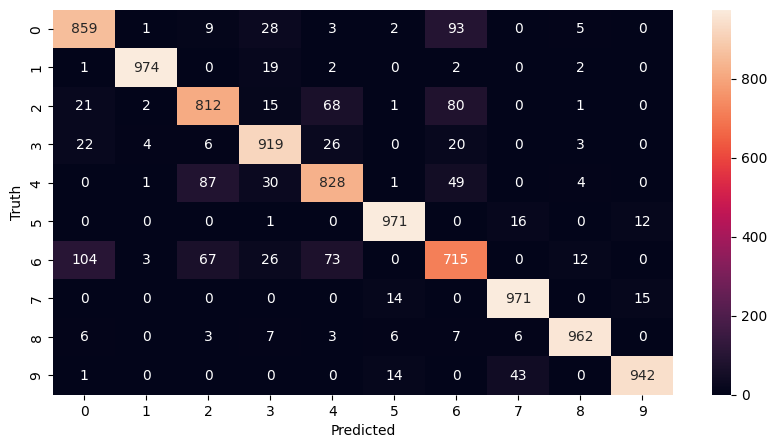

In [23]:
#In Confusion Matrix with heatmap

cm = tf.math.confusion_matrix(labels=test_labels,predictions=y_predicted_labels)
plt.figure(figsize = (10,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

prediction check

sucssfully done!!!!!

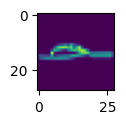

In [25]:
show_img(test_images[8])

In [26]:
class_names[y_predicted_labels[8]]

'Sandal'

Check GPU VS CPU Runtime

In [30]:
def get_model():

  model=keras.Sequential([keras.layers.Flatten(input_shape=(28, 28))]) #Flatten and input layer 

# Hidden layer 
  model.add(keras.layers.Dense(500, activation='relu'))
  model.add(keras.layers.Dense(250, activation='relu'))

#output layer
  model.add(keras.layers.Dense(10, activation='sigmoid'))

  model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model



In [33]:
# Measure training time on a CPU
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(train_images_scl, train_labels_cgl, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6719 - accuracy: 0.7801
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4695 - accuracy: 0.8372
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4267 - accuracy: 0.8510
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4011 - accuracy: 0.8605
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3811 - accuracy: 0.8665
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3641 - accuracy: 0.8711
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3508 - accuracy: 0.8758
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3389 - accuracy: 0.8793
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3290 - accuracy: 0.8826
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - lo

In [35]:
# Measure training time on a GPU

%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    gpu_model = get_model()
    gpu_model.fit(train_images_scl, train_labels_cgl, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6839 - accuracy: 0.7758
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4732 - accuracy: 0.8359
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4300 - accuracy: 0.8508
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4030 - accuracy: 0.8592
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3835 - accuracy: 0.8652
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3676 - accuracy: 0.8699
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3541 - accuracy: 0.8749
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3421 - accuracy: 0.8797
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3323 - accuracy: 0.8827
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.322